## Seminario 1: (Barra finita)

**(a)** La densidad volumétrica de carga $\rho(\vec{x})$ puede ser modelada por:  
$$
\rho(x,y,z) = \lambda(x)\delta(y)\delta(z), 
$$
con 
$$
\lambda(x)=\left\{\begin{array}{ll}
                    \lambda=Q/L, & \text{si}\ x \in(-L/2,L/2) \\
                    0, & \text{en otro caso}
                    \end{array}\right.
$$

En efecto, si calculamos la carga en todo el espacio:
\begin{aligned}
\int_{\mathbb{R}^3} \rho \,dV &= \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}\rho(x,y,z) \,dx\,dy\,dz  \\
&= \left(\int_{-\infty}^{+\infty}\lambda(x)\,dx\right)\left(\int_{-\infty}^{+\infty}\delta(y)\,dy\right)\left(\int_{-\infty}^{+\infty}\delta(z)\,dz\right) \\
&= \int_{-L/2}^{+L/2} \lambda\,dx \\
&= \lambda L = Q,
\end{aligned}

nos da la carga total en la barra finita de largo $L$.


**b)** Calculemos el campo eléctrico utilizando la librería Sympy. 

In [1]:
import sympy as sp

In [2]:
# Definición de los símbolos:
x,y,z = sp.symbols("x,y,z", real=True, nonzero=True) # coordenadas punto de observación, no puede ser nulo porque el campo diverge ahí
xp = sp.symbols("x'", real=True) # coordenada dentro de la distribución
L, l, ep = sp.symbols('L, \\lambda, \\varepsilon_0', positive=True)  # constantes positivas

In [3]:
# Definición del módulo para denominadores
mod = sp.sqrt((x-xp)**2+y**2+z**2)
display(mod)

sqrt(y**2 + z**2 + (x - x')**2)

In [4]:
# Integrando de cada componente del campo eléctrico:
int_E_x = sp.Rational(1/4)/(sp.pi*ep)*l*(x-xp)/(mod)**3
int_E_y = sp.Rational(1/4)/(sp.pi*ep)*l*(y)/(mod)**3
int_E_z = sp.Rational(1/4)/(sp.pi*ep)*l*(z)/(mod)**3
display(int_E_x,int_E_y,int_E_z)

\lambda*(x - x')/(4*pi*\varepsilon_0*(y**2 + z**2 + (x - x')**2)**(3/2))

\lambda*y/(4*pi*\varepsilon_0*(y**2 + z**2 + (x - x')**2)**(3/2))

\lambda*z/(4*pi*\varepsilon_0*(y**2 + z**2 + (x - x')**2)**(3/2))

In [5]:
# Determinación del campo eléctrico vía integración directa:
E_x = sp.integrate(int_E_x,(xp,-L/2,L/2))
E_y = sp.integrate(int_E_y,(xp,-L/2,L/2))
E_z = sp.integrate(int_E_z,(xp,-L/2,L/2))
display(E_x,E_y,E_z)

-\lambda/(4*pi*\varepsilon_0*sqrt(L**2/4 + L*x + x**2 + y**2 + z**2)) + \lambda/(4*pi*\varepsilon_0*sqrt(L**2/4 - L*x + x**2 + y**2 + z**2))

-\lambda*y*(-L/2 - x)/(4*pi*\varepsilon_0*(y**2*sqrt(y**2 + z**2 + (-L/2 - x)**2) + z**2*sqrt(y**2 + z**2 + (-L/2 - x)**2))) + \lambda*y*(L/2 - x)/(4*pi*\varepsilon_0*(y**2*sqrt(y**2 + z**2 + (L/2 - x)**2) + z**2*sqrt(y**2 + z**2 + (L/2 - x)**2)))

-\lambda*z*(-L/2 - x)/(4*pi*\varepsilon_0*(y**2*sqrt(y**2 + z**2 + (-L/2 - x)**2) + z**2*sqrt(y**2 + z**2 + (-L/2 - x)**2))) + \lambda*z*(L/2 - x)/(4*pi*\varepsilon_0*(y**2*sqrt(y**2 + z**2 + (L/2 - x)**2) + z**2*sqrt(y**2 + z**2 + (L/2 - x)**2)))

Con esto, el campo eléctrico en 3D es de la forma:
$$
\vec{E}(x,y)=E_x(x,y,z)\hat{x}+E_y(x,y,z)\hat{y}+E_z(x,y,z)\hat{z},
$$
con
$$
E_x =\frac{\lambda}{4\pi\varepsilon_0}\left[\frac{1}{\sqrt{(L/2-x)^2 + y^2 + z^2}}-\frac{1}{\sqrt{(L/2+x)^2 + y^2 + z^2}} \right],
$$
$$
E_y =\frac{\lambda}{4\pi\varepsilon_0}\left[\frac{y(L/2+x)}{(y^2+z^2)\sqrt{(L/2+x)^2 + y^2 + z^2}}+\frac{y(L/2-x)}{(y^2+z^2)\sqrt{(L/2-x)^2 + y^2 + z^2}} \right],
$$
$$
E_z =\frac{\lambda}{4\pi\varepsilon_0}\left[\frac{z(L/2+x)}{(y^2+z^2)\sqrt{(L/2+x)^2 + y^2 + z^2}}+\frac{z(L/2-x)}{(y^2+z^2)\sqrt{(L/2-x)^2 + y^2 + z^2}} \right].
$$


**(c)** Calculemos el potencial eléctrico utilizando también la librería Sympy. 

El potencial está dado por
$$
\phi(x,y) = \frac{\lambda}{4\pi\varepsilon_0} \int_{-L/2}^{L/2} \frac{1}{\sqrt{(x-x')^2 + y^2}} \,dx'
$$

Haciendo la sustitución $u = x - x' \Rightarrow du = -dx'$, buscamos resolver la integral
$$
\int_{x - L/2}^{x + L/2} \frac{1}{\sqrt{u^2 + y^2}} \,du.
$$

Para ello, determinemos la integral indefinida.

In [6]:
# Se utilizarán los mismos símbolos definidos para calcular el campo eléctrico.
u = sp.symbols("u", real=True, nonzero=True)

# Definición del integrando:
f = 1/sp.sqrt(u**2+y**2)
display(f)

1/sqrt(u**2 + y**2)

In [7]:
# Integración:
int_f = sp.integrate(f,u)
display(int_f)

asinh(u/Abs(y))

In [8]:
# Será más fácil trabajar con la misma expresión con logaritmos:
log_f = int_f.rewrite(sp.log)
display(log_f)

log(u/Abs(y) + sqrt(u**2/y**2 + 1))

Es posible reescribir la expresión como 
$$
\log\left( \frac{u + \sqrt{u^2 + y^2}}{|y|} \right) = \log(u + \sqrt{u^2 + y^2}) - \log(|y|).
$$

El último término sólo depende de $y$, así que es una constante para la integral. Por lo tanto, podemos considerar la siguiente integral indefinida:
$$
\int \frac{du}{\sqrt{u^2 + y^2}} = \log(u + \sqrt{u^2 + y^2}).
$$

In [9]:
# Cálculo de phi utilizando la integral ya calculada:
int_phi = (l/(4*sp.pi*ep))*sp.log(u + sp.sqrt(u**2 + y**2))
phi = int_phi.subs(u,x+L/2) - int_phi.subs(u,x-L/2)
display(phi)

-\lambda*log(-L/2 + x + sqrt(y**2 + (-L/2 + x)**2))/(4*pi*\varepsilon_0) + \lambda*log(L/2 + x + sqrt(y**2 + (L/2 + x)**2))/(4*pi*\varepsilon_0)

Por lo tanto, el potencial puede ser escrito como
$$
\phi(x,y) = \frac{\lambda}{4\pi\varepsilon_0} \log\left( \frac{x + L/2 + \sqrt{(x + L/2)^2 + y^2}}{x - L/2 + \sqrt{(x - L/2)^2 + y^2}} \right).
$$

**(d)**  Recordemos que el campo electrostático, en términos del potencial, puede ser escrito como
$$
\vec{E} =  - \vec{\nabla} \phi(x,y) = - \frac{\partial\phi(x,y)}{\partial x} \hat{x} - \frac{\partial\phi(x,y)}{\partial y} \hat{y}.
$$

In [10]:
# Determinación del campo eléctrico vía gradiente del potencial eléctrico:
Ex = -sp.simplify(sp.diff(phi,x))
Ey = -sp.simplify(sp.diff(phi,y))
display(Ex)
display(Ey)

-\lambda/(2*pi*\varepsilon_0*sqrt(L**2 + 4*L*x + 4*x**2 + 4*y**2)) + \lambda/(2*pi*\varepsilon_0*sqrt(L**2 - 4*L*x + 4*x**2 + 4*y**2))

-\lambda*y/(4*pi*\varepsilon_0*sqrt(y**2 + (L/2 + x)**2)*(L/2 + x + sqrt(y**2 + (L/2 + x)**2))) + \lambda*y/(4*pi*\varepsilon_0*sqrt(y**2 + (L/2 - x)**2)*(-L/2 + x + sqrt(y**2 + (L/2 - x)**2)))

**(e)** Grafiquemos el campo eléctrico en el plano $xy$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

Usando el comando `meshgrid` de Numpy, definimos una grilla en el plano $xy$. 


In [12]:
L = 2 # Longitud de la barra
n = 20 # nodos de la grilla
max = 2 # máximo y mínimo del gráfico

# Particiones de los ejes x e y:
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)

# Definición de la grilla:
x,y = np.meshgrid(X,Y)

Definimos dos funciones para las componentes $E_x$ y $E_y$ del campo vectorial 2D:
$$
\vec{E}(x,y)=E_x(x,y)\hat{x}+E_y(x,y)\hat{y}.
$$
En nuestro caso (eliminando el factor $\lambda/(4\pi\varepsilon_0)$ que es irrelevante para los gráficos): 
$$
E_x = \frac{1}{\sqrt{(x-L/2)^2 + y^2}} - \frac{1}{\sqrt{(x+L/2)^2 + y^2}}
$$
$$
E_y =\frac{\frac{L}{2} - x}{y^{2} \sqrt{1 + \frac{\left(\frac{L}{2} - x\right)^{2}}{y^{2}}}} - \frac{- \frac{L}{2} - x}{y^{2} \sqrt{1 + \frac{\left(- \frac{L}{2} - x\right)^{2}}{y^{2}}}}
$$



In [13]:
def Ex(x,y): 
    return 1/np.sqrt((x-L/2)**2 + y**2) - 1/np.sqrt((x+L/2)**2 + y**2)
def Ey(x,y):
    return y/((np.sqrt(y**2 + (x-L/2)**2))*(np.sqrt((x-L/2)**2+y**2)+x-L/2)) -y/((np.sqrt(y**2 + (x+L/2)**2))*(np.sqrt((x+L/2)**2+y**2) +x+L/2))
def E(x,y): # módulo del campo eléctrico, para normalización
    return np.sqrt((Ex(x,y))**2 + (Ey(x,y))**2)

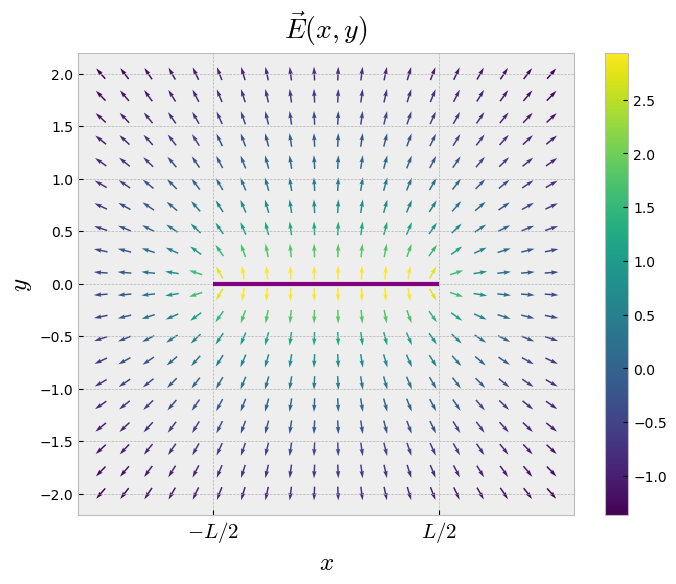

In [14]:
plt.figure(figsize=(8,6))

#Gráfica del campo y la barra:
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),np.log(E(x,y)), pivot='middle', cmap= 'viridis')
plt.hlines(0,-L/2,L/2,linewidth = 3,color ="purple")
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)

#Etiquetas de los ejes:
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.title('$\\vec{E}(x,y)$', fontsize = 20, pad = 10)
plt.xticks(ticks = [-L/2,L/2],labels = ['$-L/2$','$L/2$'], fontsize = 15)
plt.colorbar()

#plt.savefig('campo2d-normalizado-colores.pdf')

**(f)** Agreguemos algunas lı́neas de campo calculadas numéricamente al gráfico creado.

In [15]:
from scipy.integrate import odeint 

In [16]:
# Definición del sistema de EDO'S:
def f(XX,t): # XX es el arreglo de las incógnitas
    x,y = XX
    # definición del sistema 
    dxdt = Ex(x,y)/E(x,y) 
    dydt = Ey(x,y)/E(x,y)
    return [dxdt, dydt]

Además, necesitamos definir el arreglo de valores de $t$ en los que se encontrará la solución numérica, y una condición inicial $X(t=0)=[X_0(0), X_1(0), \dots, X_N(0)]$

In [17]:
t = np.linspace(0,10,1000)

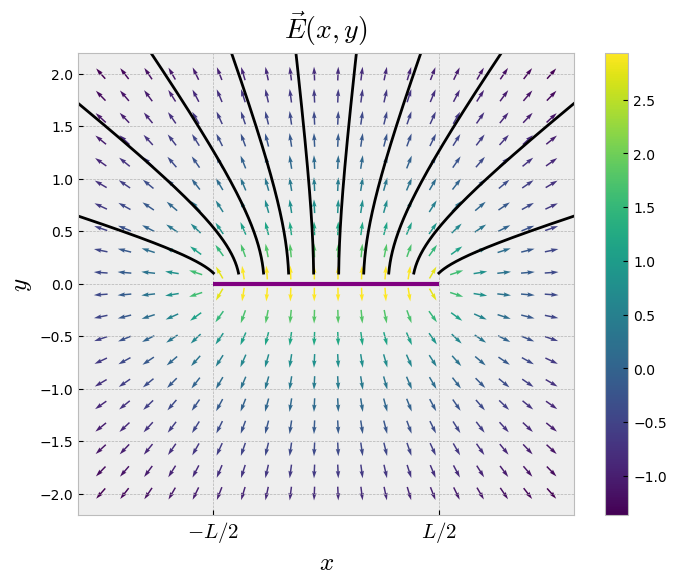

In [18]:
plt.figure(figsize=(8,6))

#Gráfica del campo y la barra:
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),np.log(E(x,y)), pivot='middle', cmap='viridis')
plt.hlines(0,-L/2,L/2,linewidth = 3,color ="purple")
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)

#Etiquetas de los ejes:
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.title('$\\vec{E}(x,y)$', fontsize = 20, pad = 10)
plt.xticks(ticks = [-L/2,L/2],labels = ['$-L/2$','$L/2$'], fontsize = 15)

lista_x_in = np.linspace(-L/2,L/2,10)  
for x_in in lista_x_in:
    #Condiciones iniciales:
    X0 = [x_in,0.1]

    #Integración numérica con odeint:
    Xsol = odeint(f,X0,t)
    xsol = Xsol[:,0]
    ysol = Xsol[:,1]

    #Gráfica de las líneas de campo:
    plt.plot(xsol,ysol, color='black', linewidth = 2)
plt.colorbar()
#plt.savefig('campo2d-normalizado-colores-y-solucion-numerica.pdf')

**(g)** Agreguemos algunas curvas equipotenciales al gráfico anterior.

In [19]:
# Definición del potencial:
def phi_n(x,y):
    return np.log(x + L/2 + np.sqrt((x+L/2)**2 + y**2)) - np.log(x - L/2 + np.sqrt((x-L/2)**2 + y**2))

In [20]:
# Definición de la grilla: 
n2 = 220 # Nodos de la grilla
max2 = 2 # Máximo y mínimo del gráfico.
X2 = np.linspace(-max2,max2,n2)
Y2 = np.linspace(-max2,max2,n2)
x2,y2 = np.meshgrid(X2,Y2)

#Curvas equipotenciales:
phi2 = phi_n(x2,y2)

<a list of 7 text.Text objects>

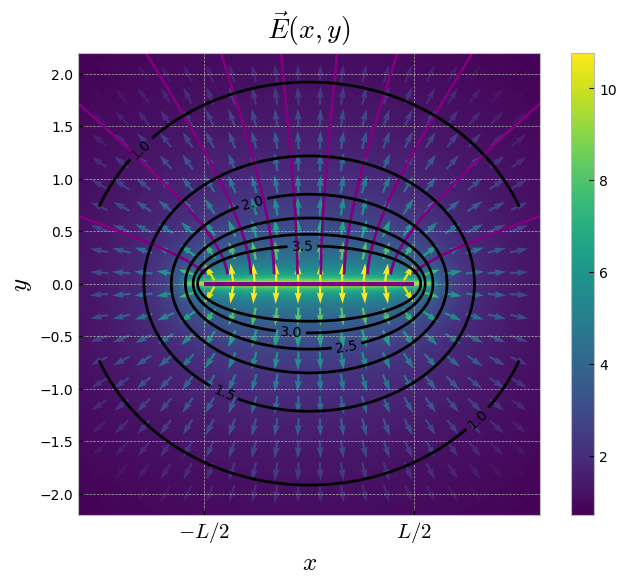

In [21]:
plt.figure(figsize=(8,6))

# Gráfica del campo y la barra:
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),np.log(E(x,y)), pivot='middle', cmap='viridis',scale = 25, width = 0.005)
plt.hlines(0,-L/2,L/2,linewidth = 3,color ="purple")
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)

# Etiquetas de los ejes:
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.title('$\\vec{E}(x,y)$', fontsize = 20, pad = 10)
plt.xticks(ticks = [-L/2,L/2],labels = ['$-L/2$','$L/2$'], fontsize = 15)

lista_x_in = np.linspace(-L/2,L/2,10)  
for x_in in lista_x_in:
    # Condiciones iniciales:
    X0 = [x_in,0.1]

    # Integración numérica con odeint:
    Xsol = odeint(f,X0,t)
    xsol = Xsol[:,0]
    ysol = Xsol[:,1]

    # Gráfica de las líneas de campo:
    plt.plot(xsol,ysol, color='purple', linewidth = 2)

# Gráfica de las curvas equipontenciales:
plt.imshow(phi2,extent=[-1.2*max, 1.2*max, -1.2*max, 1.2*max])
plt.colorbar()
c = plt.contour(x2,y2,phi2, levels=[1,1.5,2,2.5,3,3.5], colors='black')
plt.clabel(c, inline=True)


#plt.savefig('campo+potencial.pdf')

**(h)** Límite $L\to\infty$:

Verificamos que el potencial $\phi$, para un valor de $L$ finito, se anula en el infinito, esto es consecuencia de que se eligió la constante aditiva del potencial en el cálculo (integral) para que satisfaciese esta condición.


In [22]:
# Redefinimos x e y como símbolos de nuevo (antes contenían arreglos):
x = sp.symbols("x")
y = sp.symbols("y")
L = sp.symbols("L", Positive= True)

phi4 = sp.log(x + L/2 + sp.sqrt((x+L/2)**2 + y**2)) - sp.log(x - L/2 + sp.sqrt((x-L/2)**2 + y**2)) #Potencial con lambda cosntante.

In [23]:
limit_phi = sp.limit(phi4, L, sp.oo)
display(limit_phi)

oo

Sin embargo, al tomar el límite $L\to\infty$ directamente en $\phi$ se obtiene un resultado divergente. Esto es debido a que no es posible elegir el potencial igual a $0$ en el infinito en el caso en que la línea tenga longitud infinita, ya que la distribución no es compacta en este caso. 

Podemos verificar también rápidamente que el campo eléctrico sí tiende al valor conocido del campo de una línea infinita, con una densidad $\lambda$ constante.

In [24]:
# Componentes del campo eléctrico, donde se omitió la parte constante lambda y la constante de proporcionalidad Coulomb:

Ey1 = y/((sp.sqrt(y**2 + (x-L/2)**2))*(sp.sqrt((x-L/2)**2+y**2)+x-L/2)) -y/((sp.sqrt(y**2 + (x+L/2)**2))*(sp.sqrt((x+L/2)**2+y**2) +x+L/2))
Ex1 = 1.0/(sp.sqrt((x-L/2)**2+y**2)) - 1.0/(sp.sqrt((x+L/2)**2+y**2)) 

In [25]:
# Límite de la componente X:
lim_Ex = sp.limit(Ex1, L, sp.oo)

# Límite de la componente Y:
lim_Ey = sp.limit(Ey1, L, sp.oo)

display(lim_Ex,lim_Ey)

0

2/y

Así, el campo eléctrico cuando $L \to \infty$ es
$$
\vec{E} = \frac{\lambda}{2\pi\varepsilon_0 y} \hat{y}.
$$

Una forma de poder tomar el límite directamente en el potencial es primero cambiar la elección de potencial nulo en el infinito. Por ejemplo, si imponenmos que el potencial sea nulo en un punto a una distancia fija $d$ del origen sobre el eje $y$, es decir, que
$$
\phi(0,d)\stackrel{!}{=}0,
$$
entonces podemos escribir
$$
\phi'(x,y) = \phi(x,y) + \alpha
$$
tal que
$$
\phi'(0,d) = \phi(0,d) + \alpha = \frac{\lambda}{4\pi\varepsilon_0} \log\left(\frac{L/2 + \sqrt{L^2/4 + d^2}}{-L/2 + \sqrt{L^2/4 + d^2}} \right) + \alpha.
$$

Por lo tanto,
$$
\alpha = - \frac{\lambda}{4\pi\varepsilon_0} \log\left(\frac{L/2 + \sqrt{L^2/4 + d^2}}{-L/2 + \sqrt{L^2/4 + d^2}} \right)
$$
y entonces
$$
\phi'(x,y) = \frac{\lambda}{4\pi\varepsilon_0}\left[ \log\left( \frac{x + L/2 + \sqrt{(x+L/2)^2 + y^2}}{x - L/2 + \sqrt{(x - L/2)^2 + y^2}} \right) - \log\left(\frac{L/2 + \sqrt{L^2/4 + d^2}}{-L/2 + \sqrt{L^2/4 + d^2}} \right)\right].
$$


In [26]:
# Símbolo extra a utilizar:
d = sp.symbols('d', positive = True)

In [27]:
# Definición del nuevo potencial:
phi_prime = (l/(4*sp.pi*ep))*phi4 - (l/(4*sp.pi*ep))*sp.log((L/2 + sp.sqrt(L**2/4 + d**2))/(-L/2 + sp.sqrt(L**2/4 + d**2)))
display(phi_prime)

\lambda*(-log(-L/2 + x + sqrt(y**2 + (-L/2 + x)**2)) + log(L/2 + x + sqrt(y**2 + (L/2 + x)**2)))/(4*pi*\varepsilon_0) - \lambda*log((L/2 + sqrt(L**2/4 + d**2))/(-L/2 + sqrt(L**2/4 + d**2)))/(4*pi*\varepsilon_0)

In [28]:
# Cálculo del límite:
lim_phi_prime = sp.limit(phi_prime, L, sp.oo)
display(lim_phi_prime)

(2*\lambda*log(d) - \lambda*log(y**2))/(4*pi*\varepsilon_0)

Por lo tanto, el límite encontrado es
$$
\lim_{L \to \infty} \phi' = \frac{\lambda}{4\pi\varepsilon_0} \log \left(\frac{d^2}{y^2}\right) = \frac{\lambda}{2\pi\varepsilon_0}\log{\left( \frac{d}{y}\right) },
$$

que es la forma más conocida del potencial de una línea infinita de carga, de densidad constante.

**(i)** Adaptemos los gráficos en el caso en que $L$ es muy grande comparado con el tamaño de la región en el plano $xy$.

In [29]:
L = 10000 #Longitud de la barra
n = 20 # nodos de la grilla
max = 10 # máximo y mínimo del gráfico

# Particiones de los ejes x e y:
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)

# Definición de la grilla:
x,y = np.meshgrid(X,Y)

In [30]:
# Definición de la grilla: 
n3 = 220 #N odos de la grilla
max3 = 20 # Máximo y mínimo del gráfico.
X3 = np.linspace(-max3,max3,n3)
Y3 = np.linspace(-max3,max3,n3)
x3,y3 = np.meshgrid(X3,Y3)

# Curvas equipotenciales:
phi3 = phi_n(x3,y3)

<a list of 10 text.Text objects>

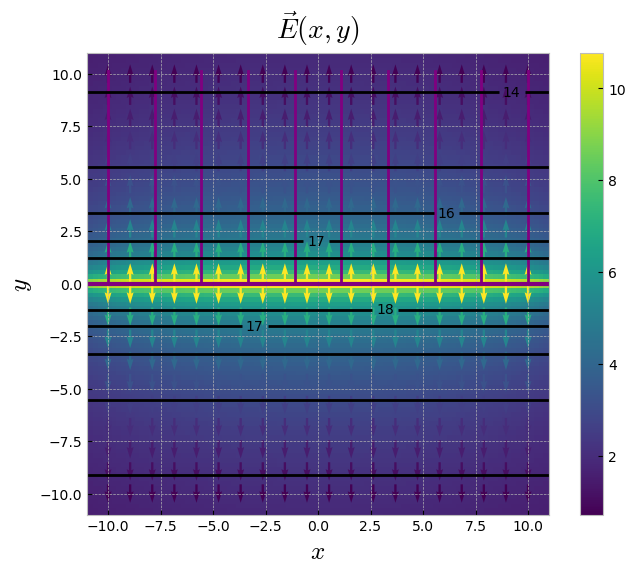

In [31]:
plt.figure(figsize=(8,6))

# Gráfica del campo y la barra:
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),np.log(E(x,y)), pivot='middle', cmap='viridis',scale = 25, width = 0.005)
plt.hlines(0,-L/2,L/2,linewidth = 3,color ="purple")
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)

# Etiquetas de los ejes:
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.title('$\\vec{E}(x,y)$', fontsize = 20, pad = 10)

lista_x_in = np.linspace(-max,max,10)  
for x_in in lista_x_in:
    # Condiciones iniciales:
    X0 = [x_in,0.1]

    # Integración numérica con odeint:
    Xsol = odeint(f,X0,t)
    xsol = Xsol[:,0]
    ysol = Xsol[:,1]

    # Gráfica de las líneas de campo:
    plt.plot(xsol,ysol, color='purple', linewidth = 2)

# Gráfica de las curvas equipontenciales:
plt.imshow(phi2,extent=[-1.2*max3, 1.2*max3, -1.2*max3, 1.2*max3])
plt.colorbar()
c = plt.contour(x3,y3,phi3, levels=[14,15,16,17,18], colors='black')
plt.clabel(c, inline=True)


#plt.savefig('barra-infinita-campo+potencial.pdf')

**(j)** Grafiquemos el campo eléctrico en tres dimensiones con quiver.

In [32]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [33]:
# Definición de las componentes del campo eléctrico en 3D:
def Ex_3d(x,y,z):
    return -1/np.sqrt((L/2+x)**2 + y**2 + z**2) + 1/np.sqrt((L/2-x)**2 + y**2 + z**2)

def Ey_3d(x,y,z):
    return (y*(L/2+x))/((y**2+z**2)*np.sqrt((L/2+x)**2 + y**2 + z**2)) + (y*(L/2-x))/((y**2+z**2)*np.sqrt((L/2-x)**2 + y**2 + z**2))

def Ez_3d(x,y,z):
    return (z*(L/2+x))/((y**2+z**2)*np.sqrt((L/2+x)**2 + y**2 + z**2)) + (z*(L/2-x))/((y**2+z**2)*np.sqrt((L/2-x)**2 + y**2 + z**2))

In [34]:
L = 15 # Longitud de la barra
n = 6 # nodos de la grilla
max = 13 # máximo y mínimo del gráfico

# Particiones de los ejes xyz:
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
Z = np.linspace(-max,max,n)

# Definición de la grilla:
x, y, z = np.meshgrid(X,Y,Z)

<IPython.core.display.Javascript object>


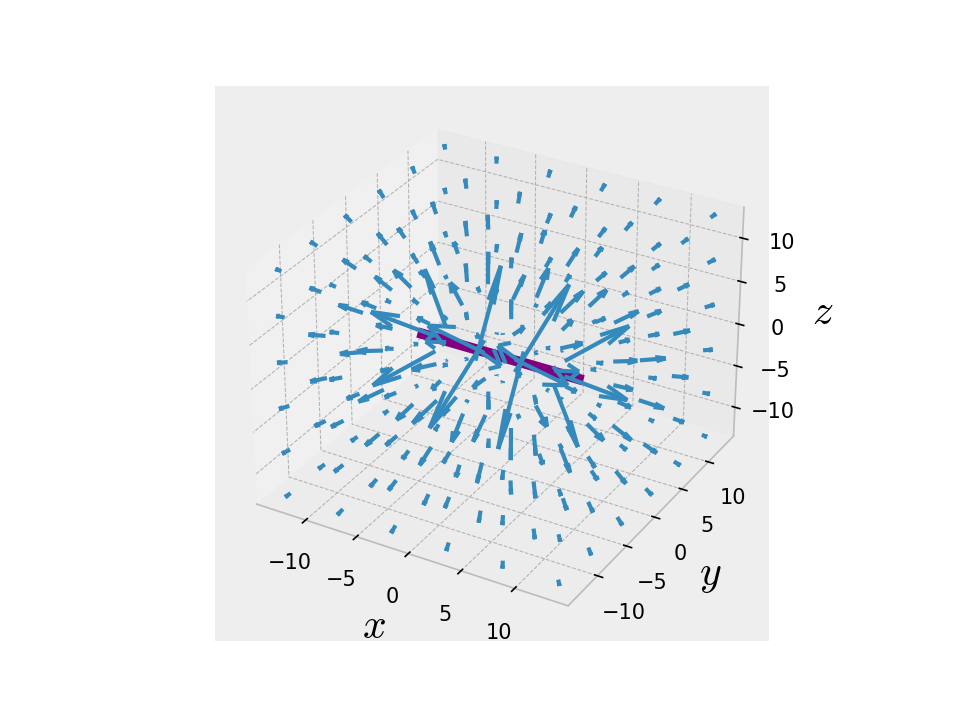

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$y$', fontsize = 20)
ax.set_zlabel('$z$', fontsize = 20)
ax.plot([-L/2,L/2],[0,0],[0,0], color='purple', linewidth=5)
ax.quiver(x, y, z, Ex_3d(x,y,z), Ey_3d(x,y,z), Ez_3d(x,y,z), length=20, normalize= False, arrow_length_ratio=0.4, pivot='middle')